In [1]:
import numpy as np
import sep
import time
import glob
# additional setup for reading the test image and displaying plots
#import fitsio
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams

%matplotlib inline

#rcParams['figure.figsize'] = [18., 15.]

In [2]:
# read image into standard 2-d numpy array
hdu_r = fits.open("../images-withmag/iDR4_3_MC0071_0104454_14.022397994995117_-70.32392120361328_g.fits")
hdu_j660 = fits.open("../images-withmag/iDR4_3_MC0071_0104454_14.022397994995117_-70.32392120361328_r.fits")
hdu_i = fits.open("../images-withmag/iDR4_3_MC0071_0104454_14.022397994995117_-70.32392120361328_i.fits")

In [3]:
data_r = hdu_r[0].data
data_j660 = hdu_j660[0].data
data_i = hdu_i[0].data

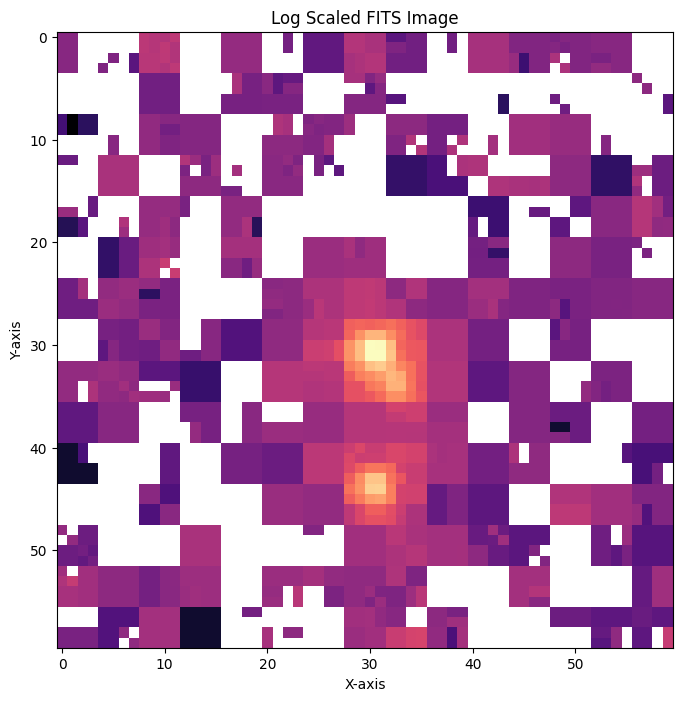

In [4]:
# Apply logarithmic scaling
#log_data = np.log(data_j660)  # Adding 1 to avoid logarithm of zero

# Plot the logarithmically scaled FITS image
plt.figure(figsize=(8, 8))
plt.imshow(data_i,  cmap='magma', norm=LogNorm())
# I chose the tick marks based on the histogram above
# I chose the tick marks based on the histogram above
#cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
#cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
#plt.colorbar(label='Log(Intensity)')
plt.title('Log Scaled FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


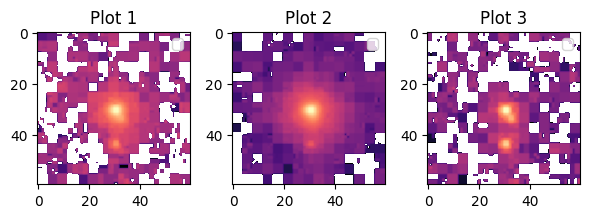

In [5]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(6, 9))  # 3 rows, 1 column

# Plot data on the first subplot (top)
axs[0].imshow(data_r,  cmap='magma', norm=LogNorm())
axs[0].set_title('Plot 1')
axs[0].legend()

# Plot data on the second subplot (middle)
axs[1].imshow(data_j660,  cmap='magma', norm=LogNorm())
axs[1].set_title('Plot 2')
axs[1].legend()

# Plot data on the third subplot (bottom)
axs[2].imshow(data_i,  cmap='magma', norm=LogNorm())
axs[2].set_title('Plot 3')
axs[2].legend()

# Add space between subplots
plt.tight_layout()

# Show the figure
plt.show()


# Automatic

In [6]:
def plot_fits(data_r, data_j660, data_i):
    fig, axs = plt.subplots(1, 3, figsize=(8, 11))  # 3 rows, 1 column

    # Plot data on the first subplot (top)
    axs[0].imshow(data_r,  cmap='magma', norm=LogNorm())
    axs[0].set_title('R')
    #axs[0].legend()

    # Plot data on the second subplot (middle)
    axs[1].imshow(data_j660,  cmap='magma', norm=LogNorm())
    axs[1].set_title('J0660')
    #axs[1].legend()

    # Plot data on the third subplot (bottom)
    axs[2].imshow(data_i,  cmap='magma', norm=LogNorm())
    axs[2].set_title('I')
    #axs[2].legend()

    # Add space between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()    

In [7]:
#Pattern FITS
path_to_directory = '../images-withmag/*'
# Use a custom pattern to list files and directories without 'x' in their names
pattern_r = path_to_directory + '*g.fits'
files_fits_r = glob.glob(pattern_r)

In [8]:
pattern_j660 = path_to_directory + '*r.fits'
files_fits_j660 = glob.glob(pattern_j660)


In [9]:
pattern_i = path_to_directory + '*i.fits'
files_fits_i = glob.glob(pattern_i)
len(files_fits_i)

73

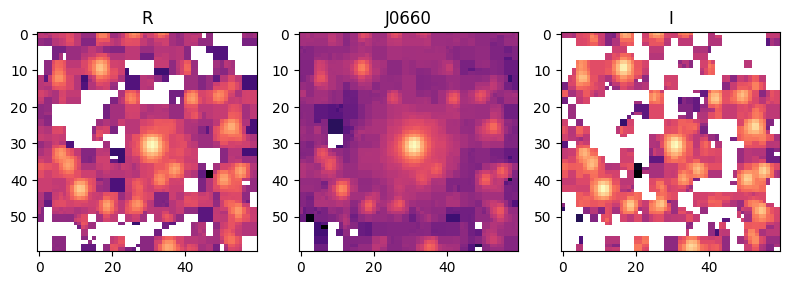

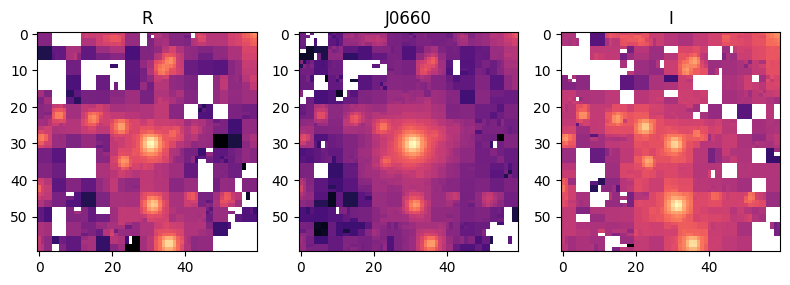

ValueError: vmin must be less or equal to vmax

<Figure size 800x1100 with 3 Axes>

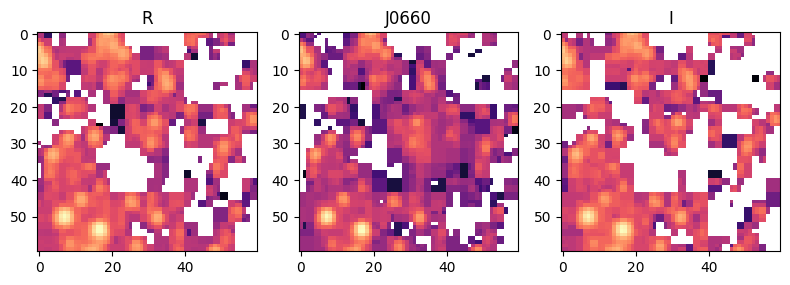

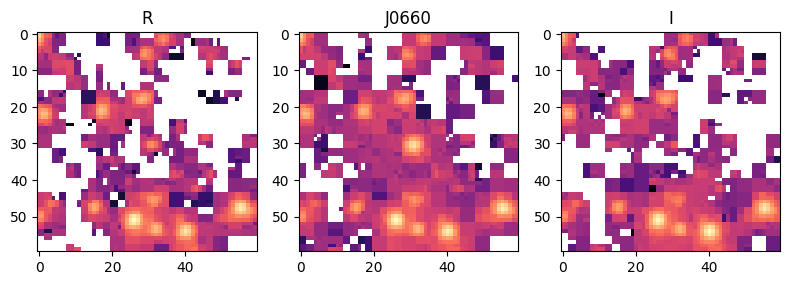

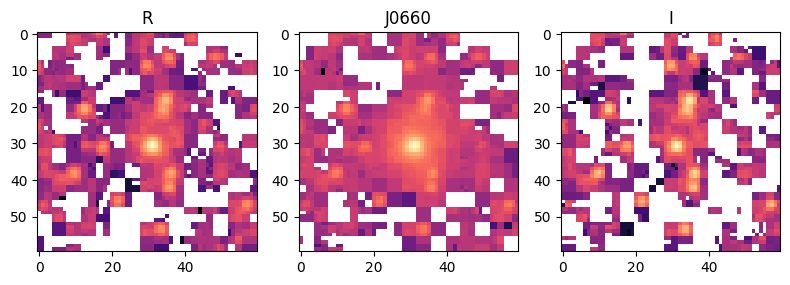

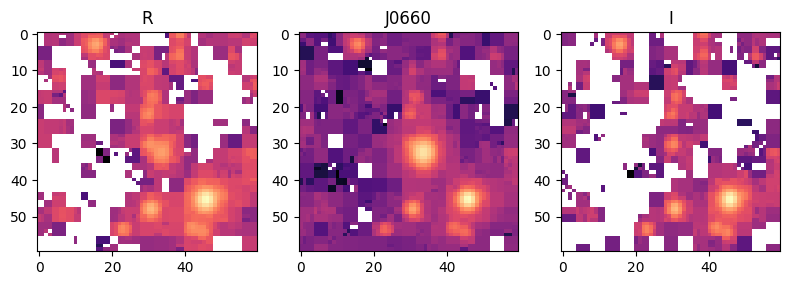

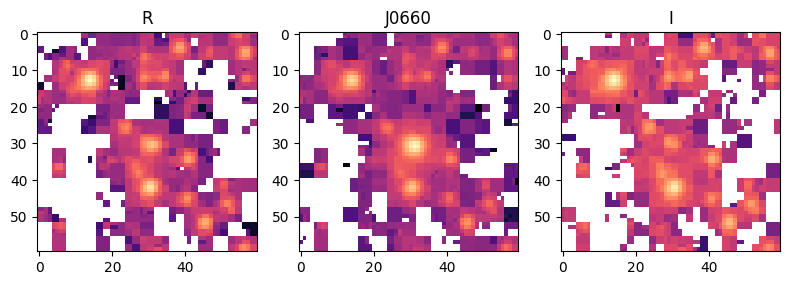

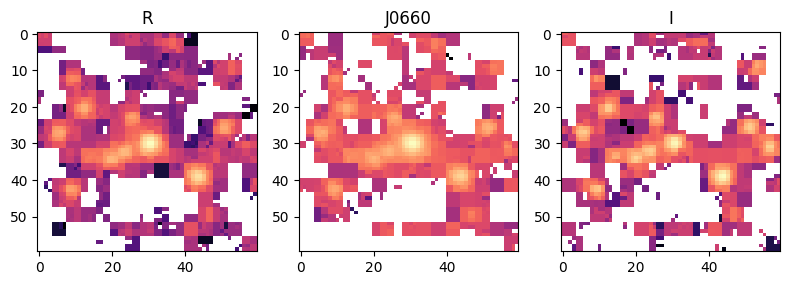

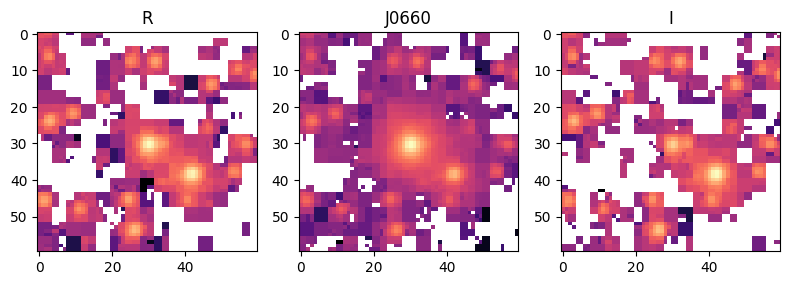

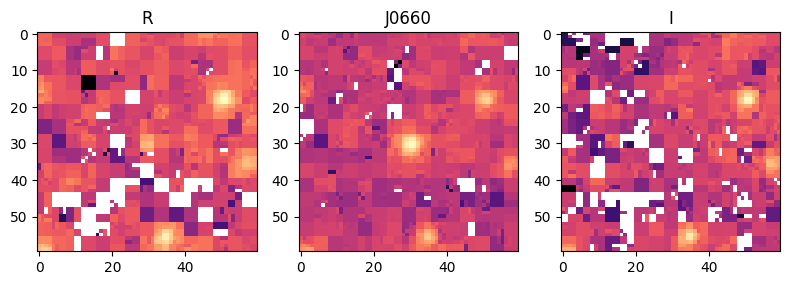

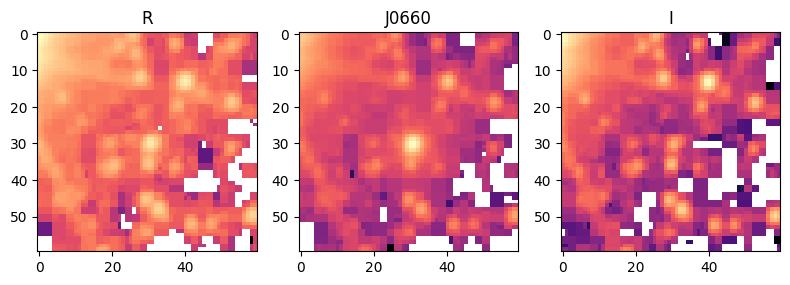

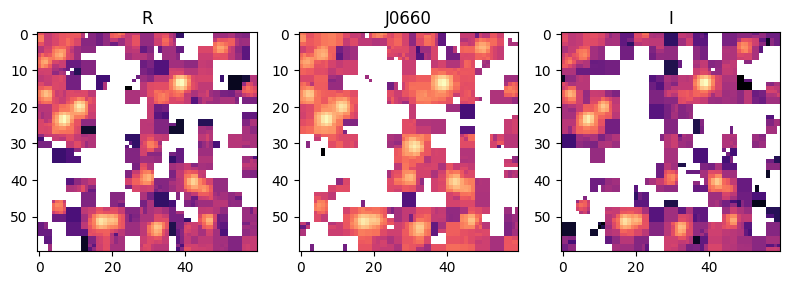

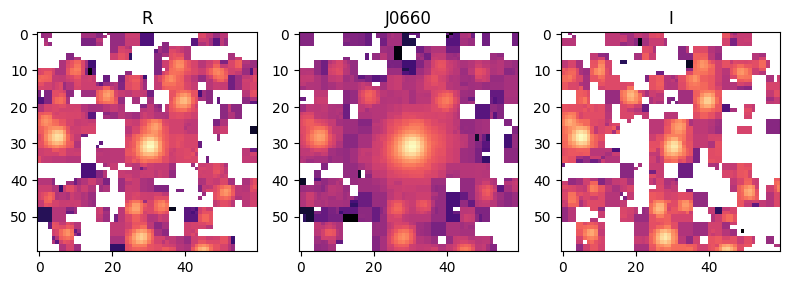

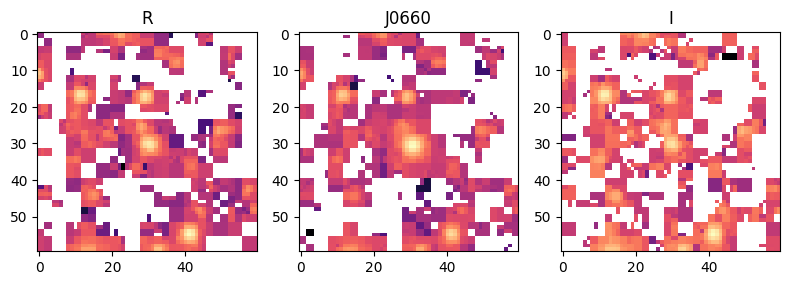

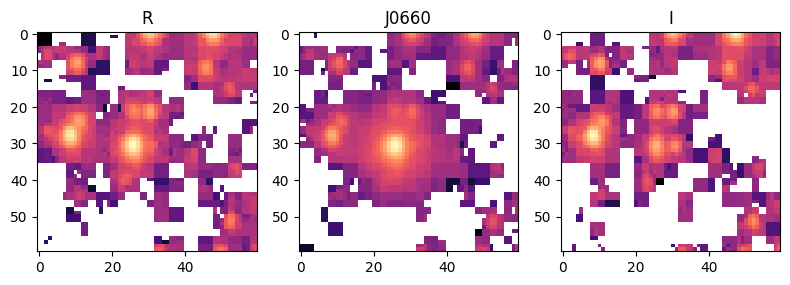

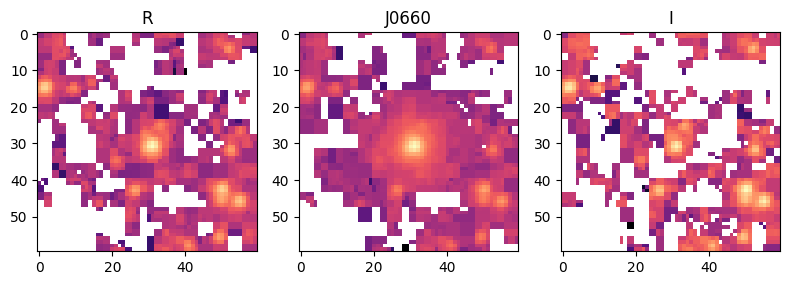

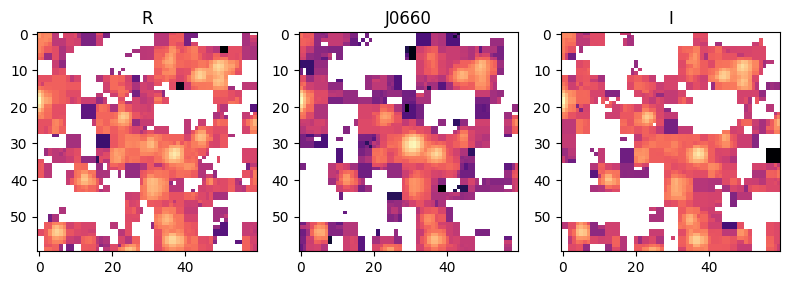

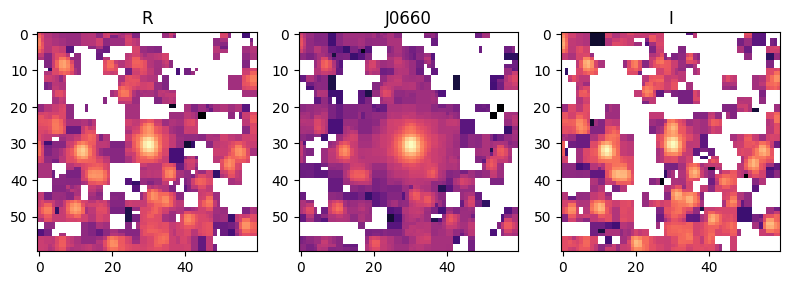

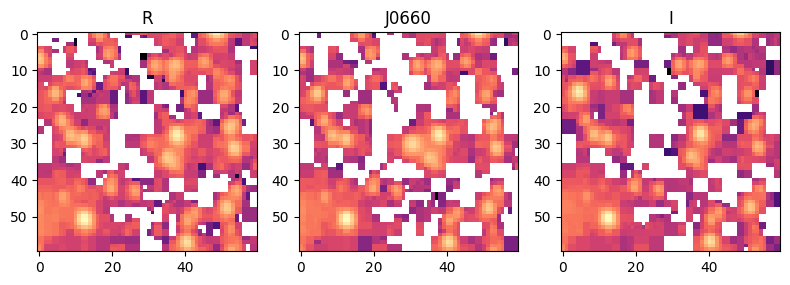

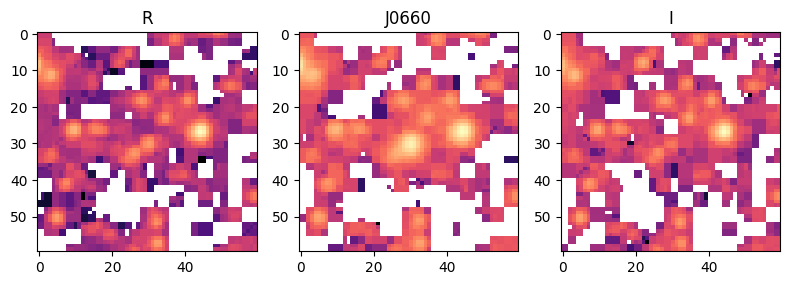

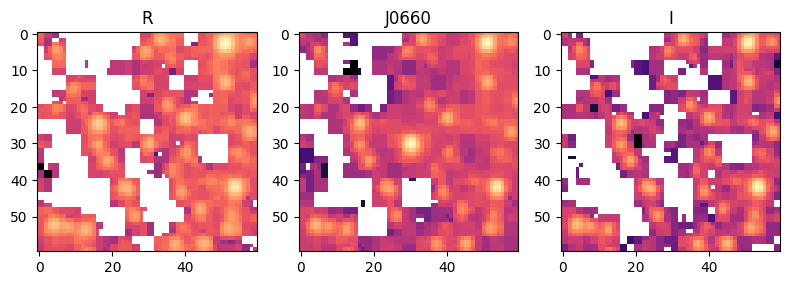

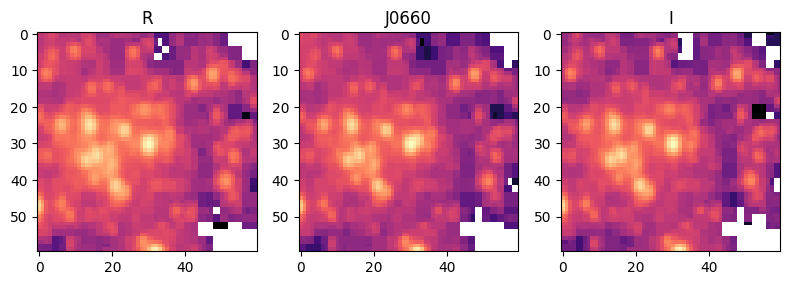

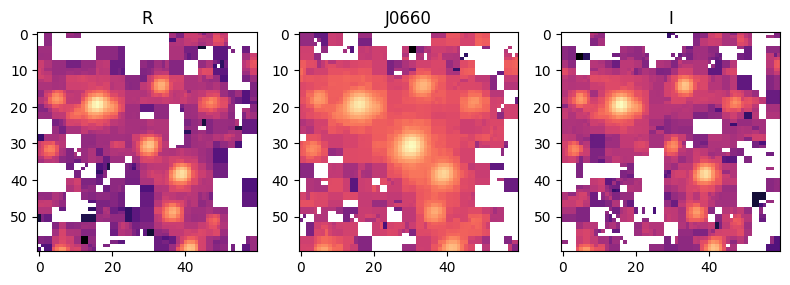

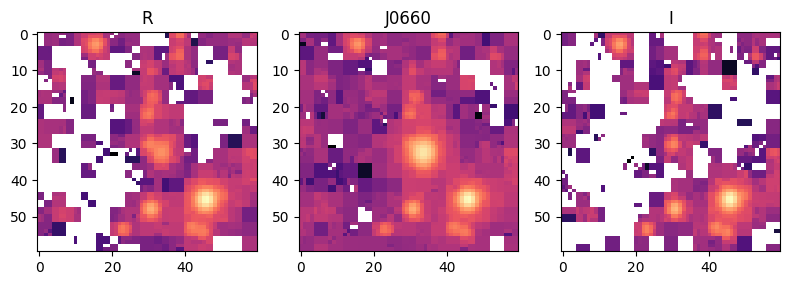

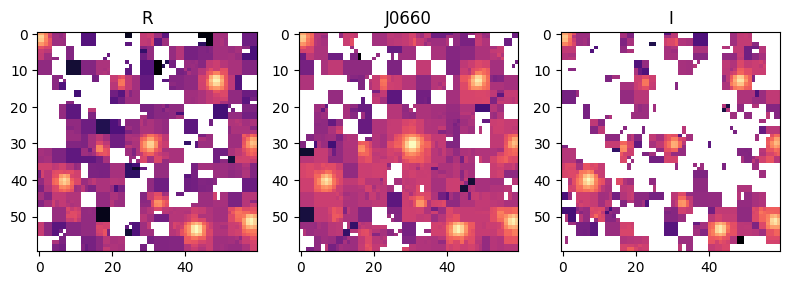

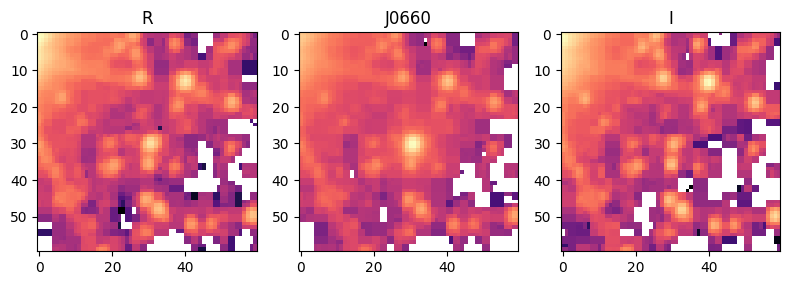

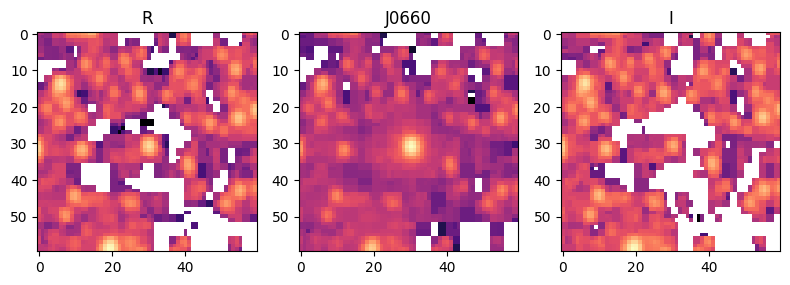

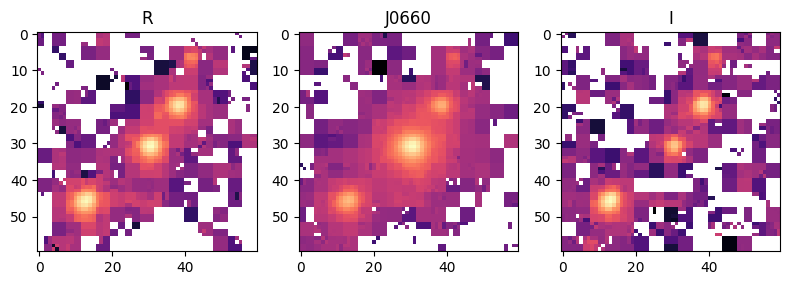

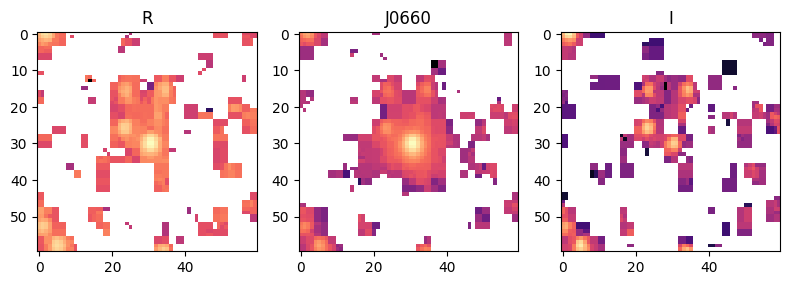

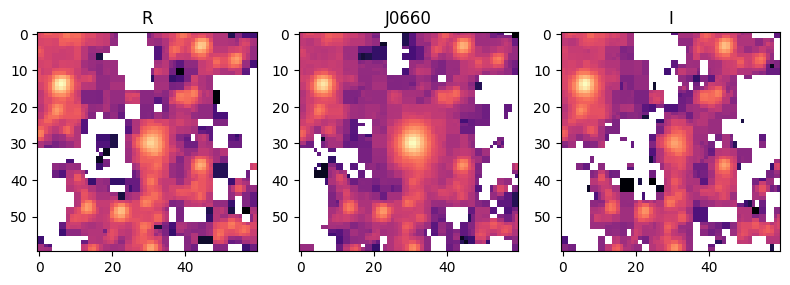

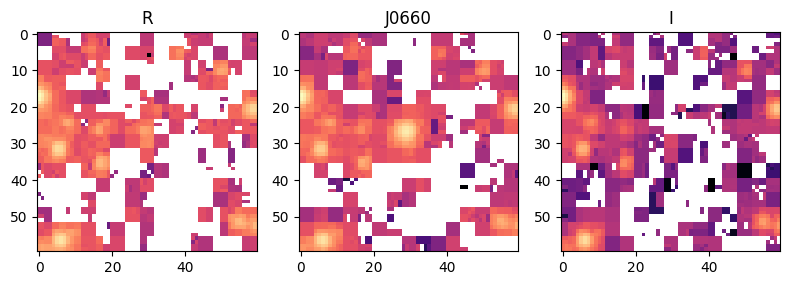

ValueError: vmin must be less or equal to vmax

<Figure size 800x1100 with 3 Axes>

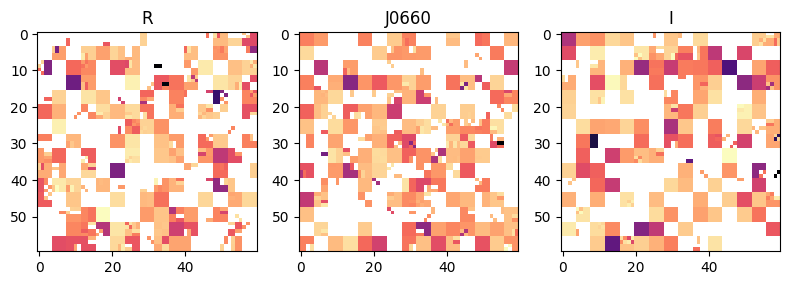

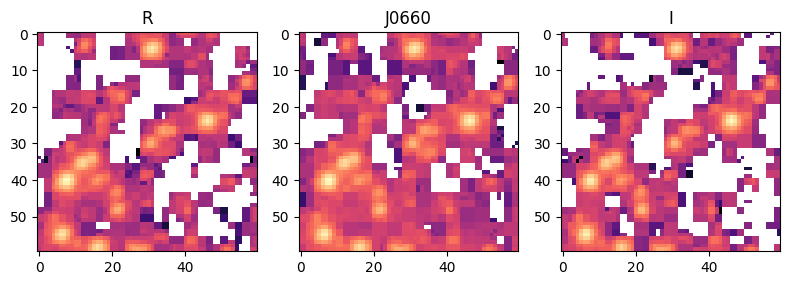

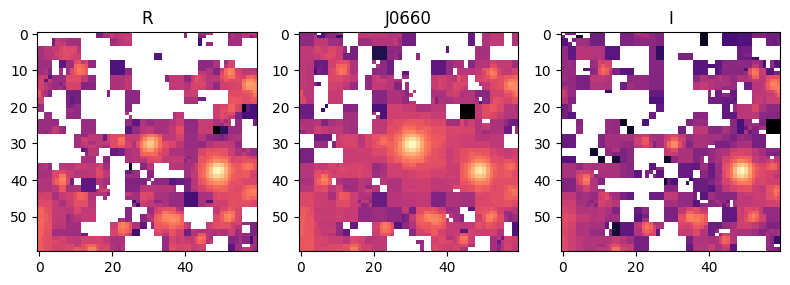

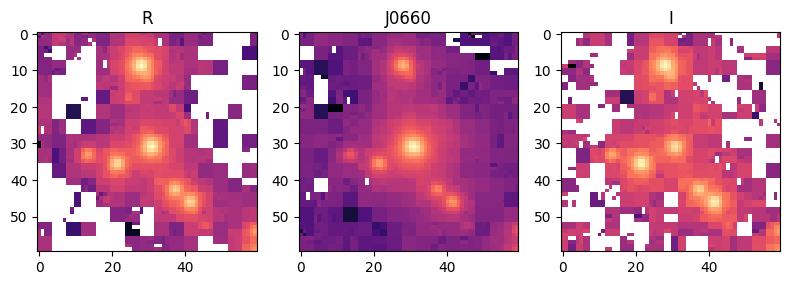

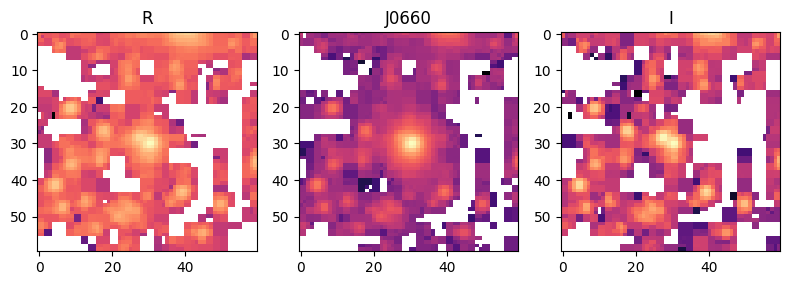

ValueError: vmin must be less or equal to vmax

<Figure size 800x1100 with 3 Axes>

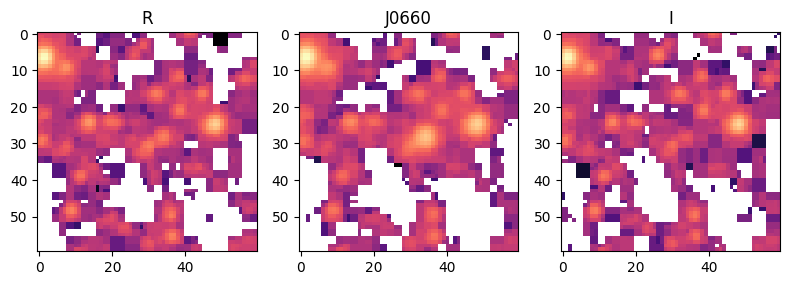

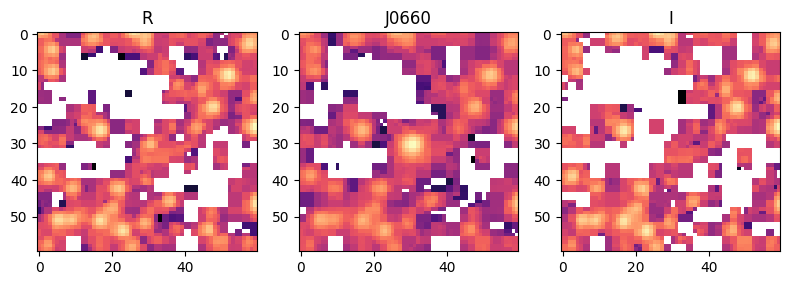

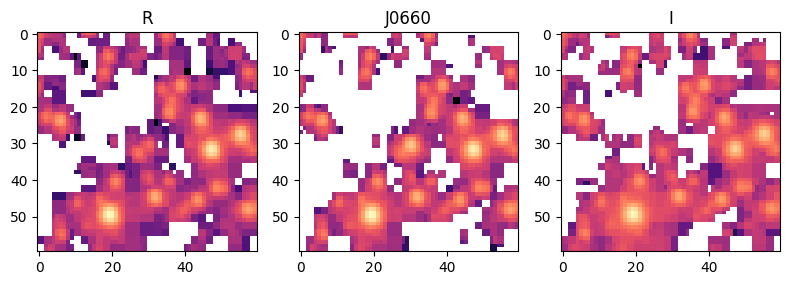

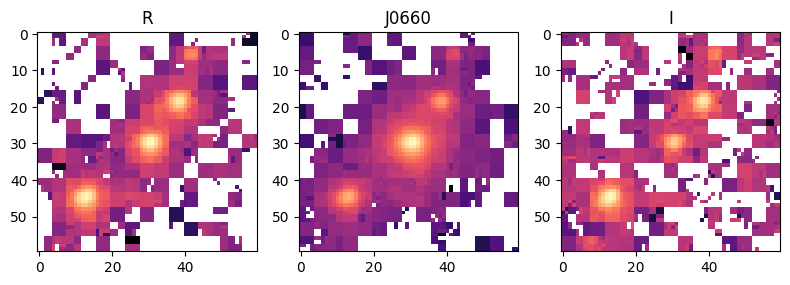

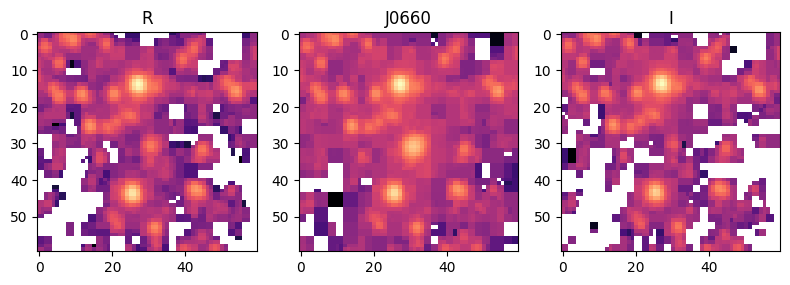

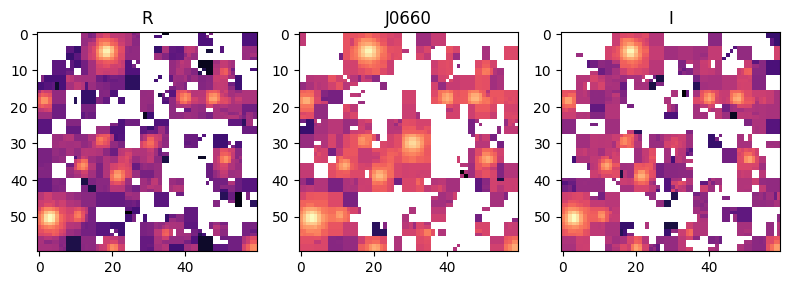

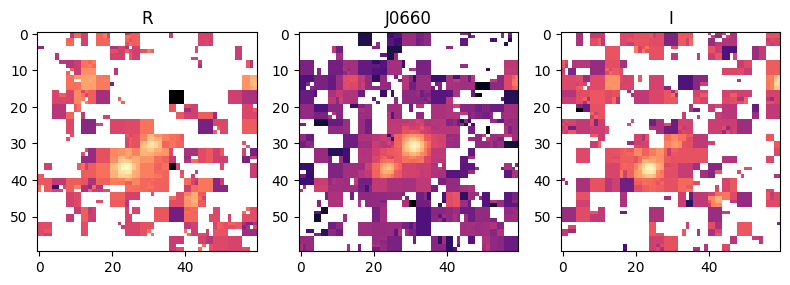

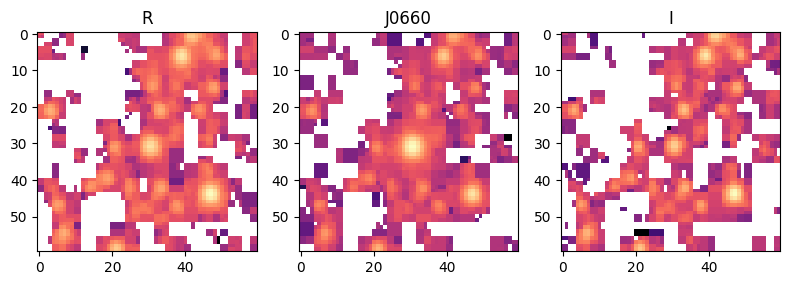

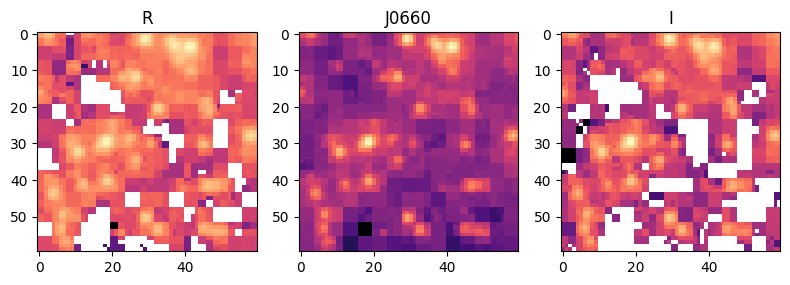

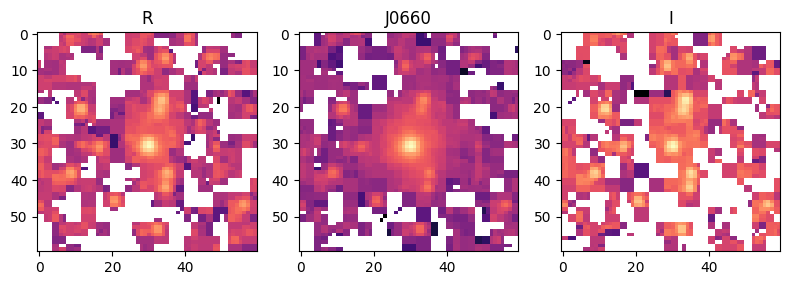

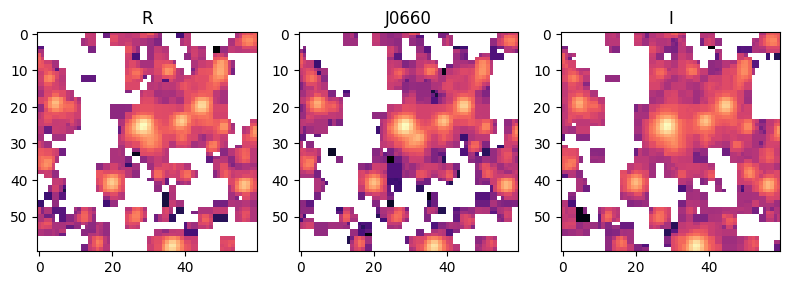

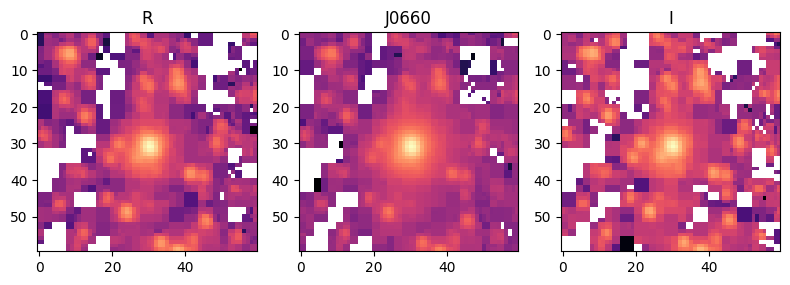

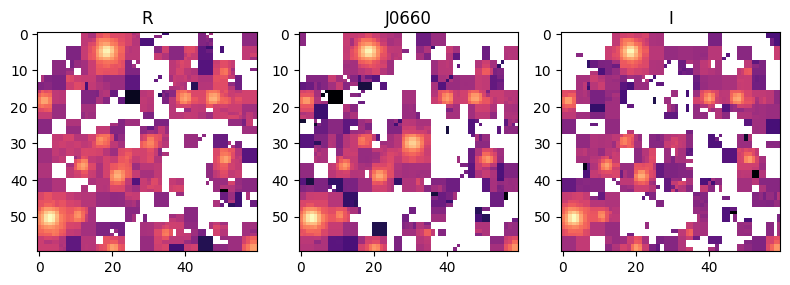

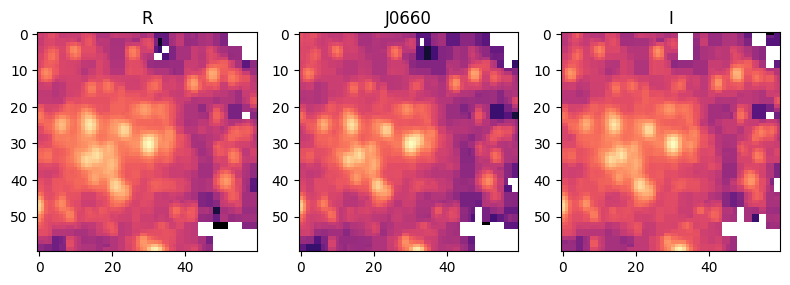

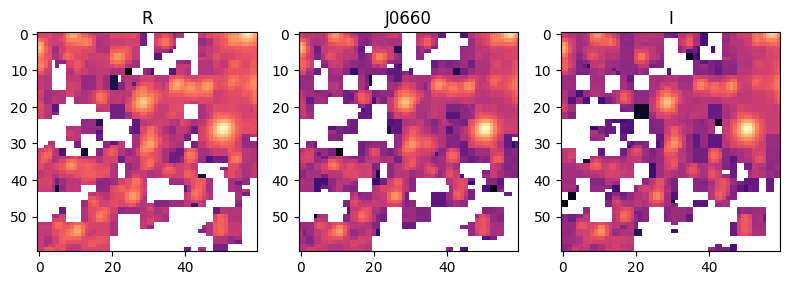

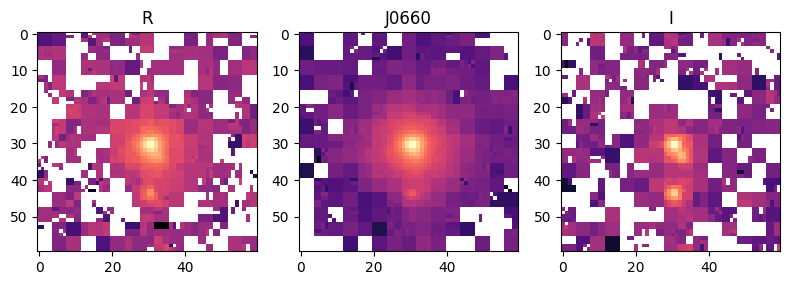

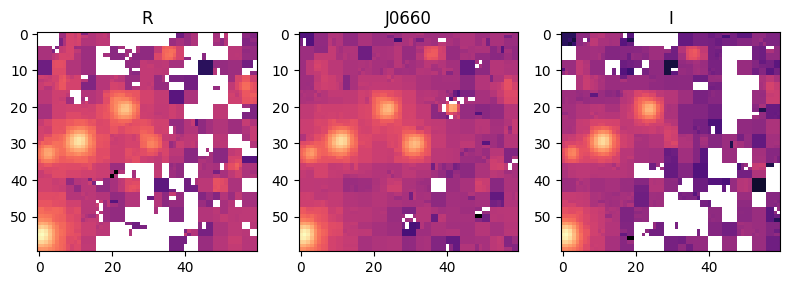

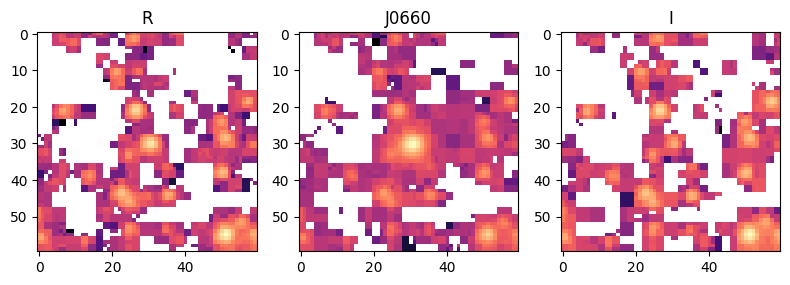

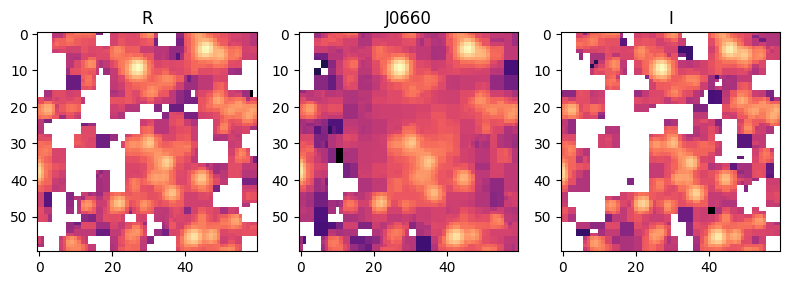

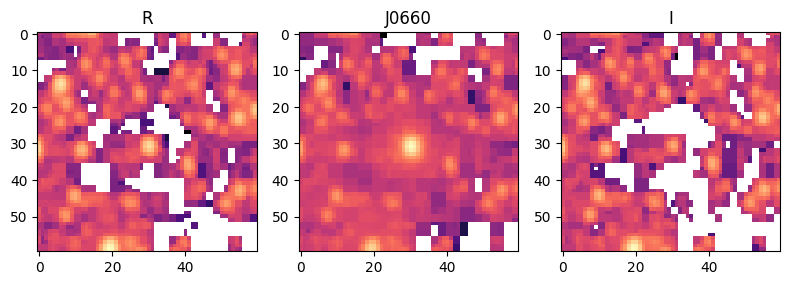

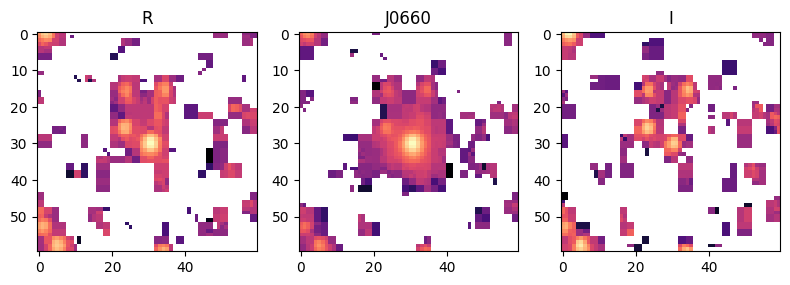

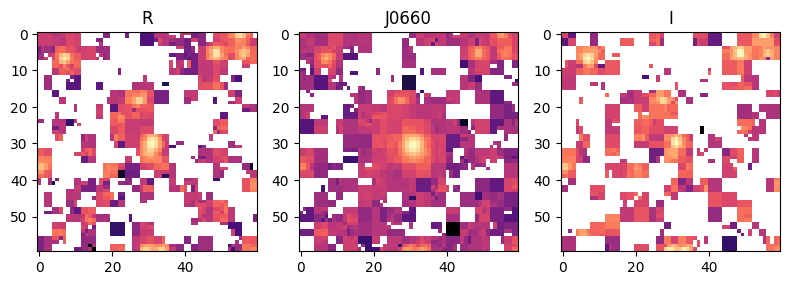

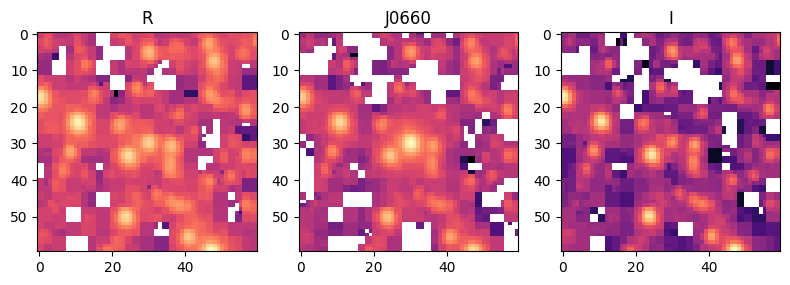

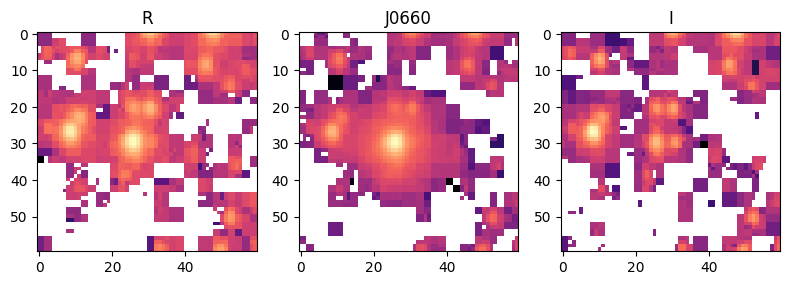

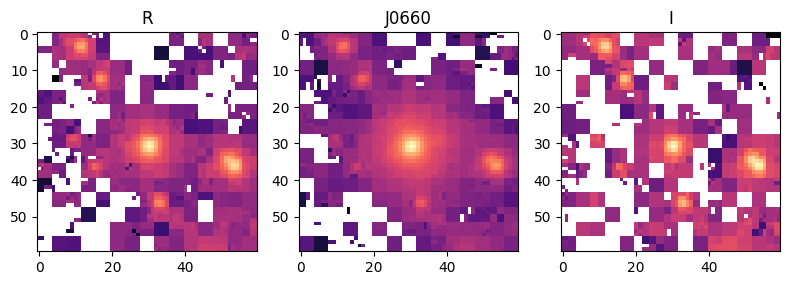

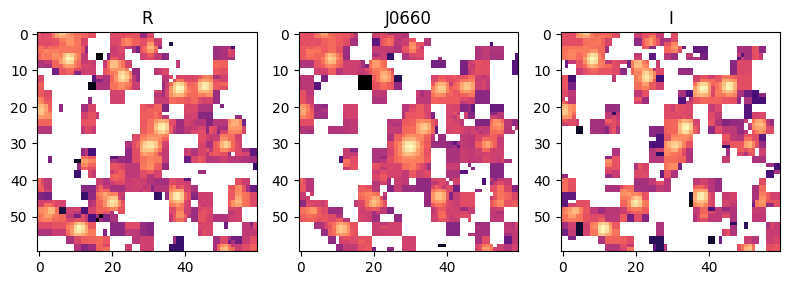

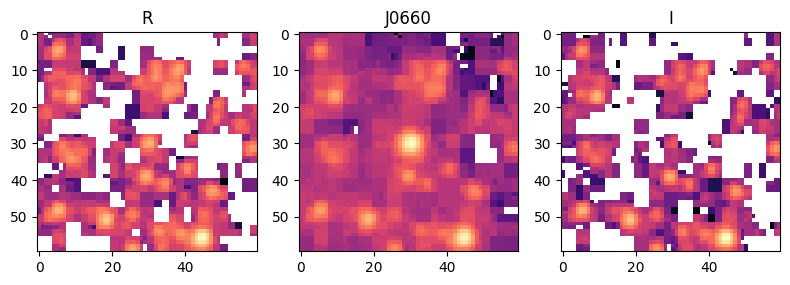

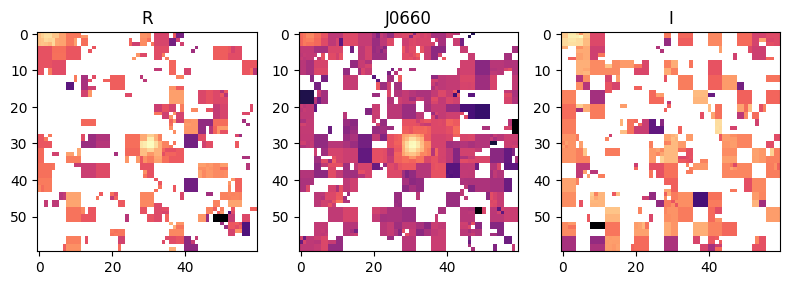

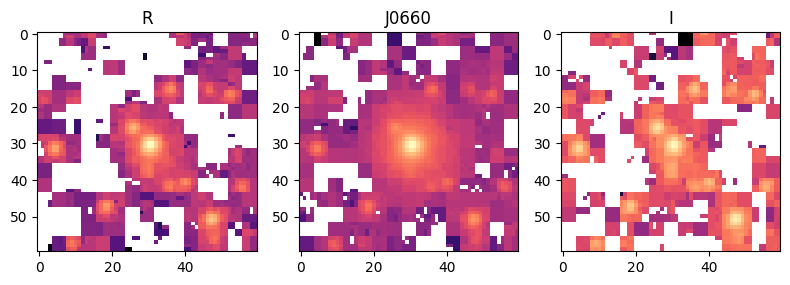

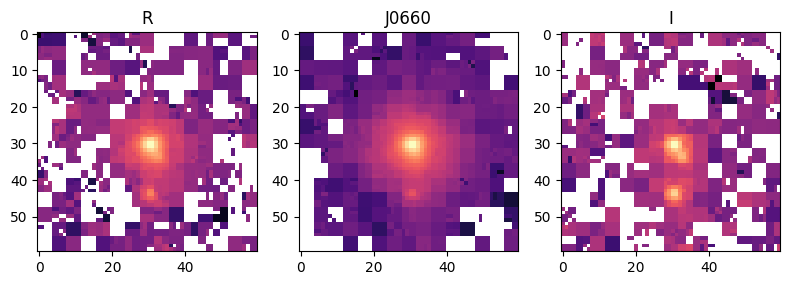

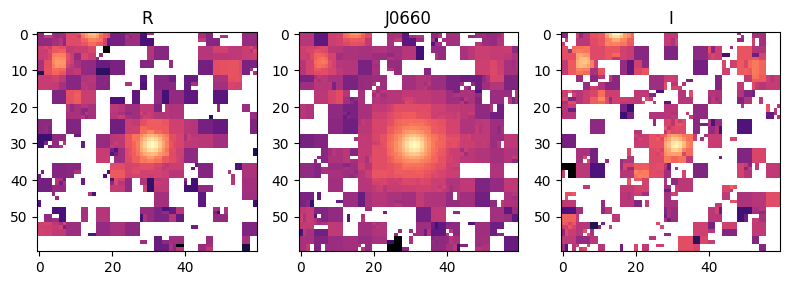

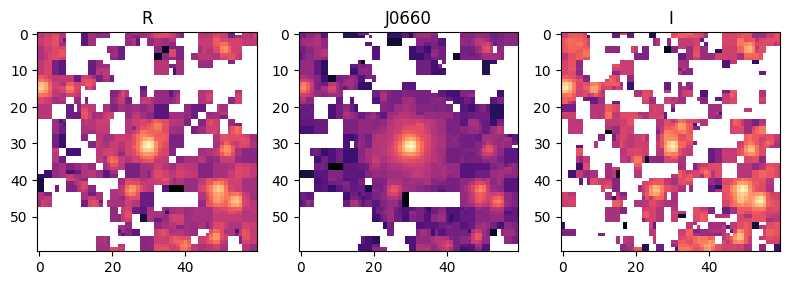

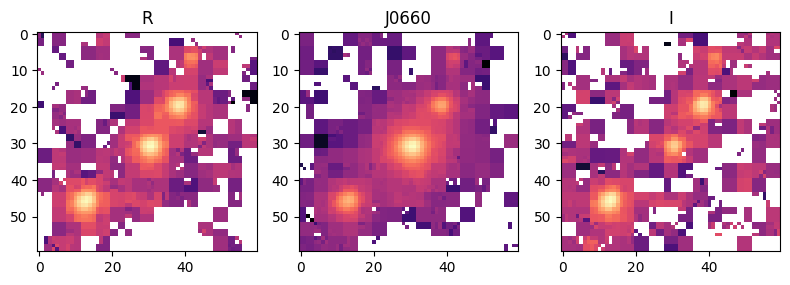

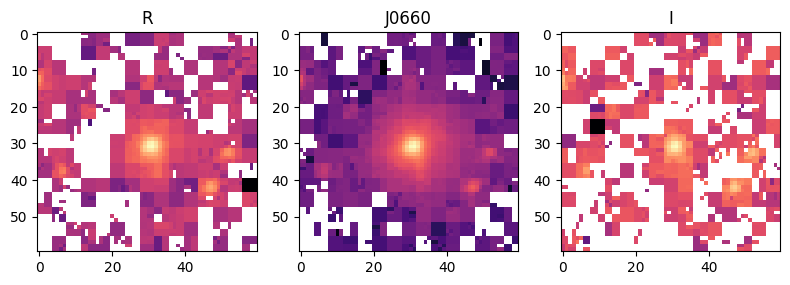

In [10]:
for i in files_fits_r:
    for j in files_fits_j660:
        for k in files_fits_i:
            if i.split("_g")[0] == j.split("_r")[0] == k.split("_i")[0]:
                hdu_r = fits.open(i)
                hdu_j660 = fits.open(j)
                hdu_i = fits.open(k)
                data_r = hdu_r[0].data
                data_j660 = hdu_j660[0].data
                data_i = hdu_i[0].data
                plot_fits(data_r, data_j660, data_i)
                